In [1]:
from IPython.display import display, HTML
p="Train on Actual Tasks:"
html_markup="<h1>" +p+ "</h1>"
display(HTML(html_markup))

Number of Epoch [1/10], Loss: 0.2411, Accuracy: 0.9263
Number of Epoch [2/10], Loss: 0.0660, Accuracy: 0.9788
Number of Epoch [3/10], Loss: 0.0479, Accuracy: 0.9852
Number of Epoch [4/10], Loss: 0.0382, Accuracy: 0.9882
Number of Epoch [5/10], Loss: 0.0329, Accuracy: 0.9896
Number of Epoch [6/10], Loss: 0.0265, Accuracy: 0.9912
Number of Epoch [7/10], Loss: 0.0238, Accuracy: 0.9922
Number of Epoch [8/10], Loss: 0.0203, Accuracy: 0.9930
Number of Epoch [9/10], Loss: 0.0176, Accuracy: 0.9943
Number of Epoch [10/10], Loss: 0.0149, Accuracy: 0.9950
Number of Epoch [1/10], Loss: 0.1530, Accuracy: 0.9540
Number of Epoch [2/10], Loss: 0.0460, Accuracy: 0.9864
Number of Epoch [3/10], Loss: 0.0315, Accuracy: 0.9903
Number of Epoch [4/10], Loss: 0.0235, Accuracy: 0.9921
Number of Epoch [5/10], Loss: 0.0176, Accuracy: 0.9947
Number of Epoch [6/10], Loss: 0.0140, Accuracy: 0.9957
Number of Epoch [7/10], Loss: 0.0128, Accuracy: 0.9960
Number of Epoch [8/10], Loss: 0.0093, Accuracy: 0.9970
Number of

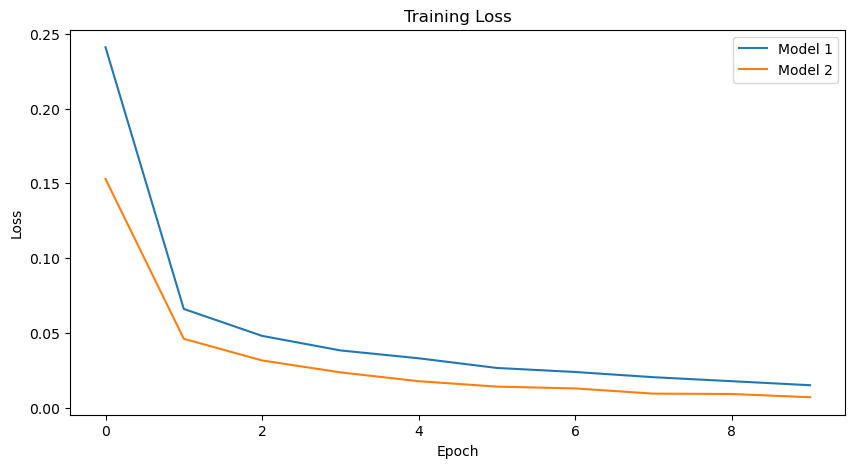

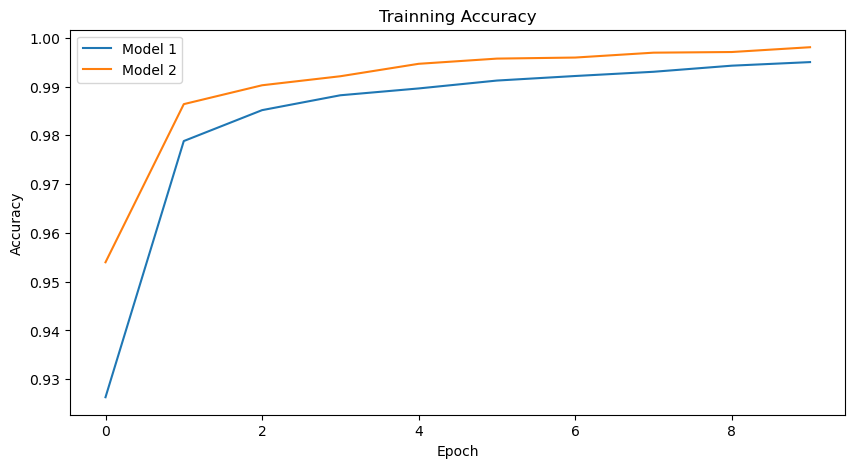

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Function to train a model
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    loss_values = []
    accuracy_values = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_predictions = 0
        total_samples = 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_samples += labels.size(0)
            correct_predictions += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader)
        accuracy = correct_predictions / total_samples

        loss_values.append(epoch_loss)
        accuracy_values.append(accuracy)

        print(f'Number of Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.4f}')

    return loss_values, accuracy_values

# Function to visualize training process
def visualize_training_process(loss_values_list, accuracy_values_list, model_names):
    
    # Plot training loss for all models
    plt.figure(figsize=(10, 5))
    for i, loss_values in enumerate(loss_values_list):
        plt.plot(loss_values, label=f'{model_names[i]}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Training Loss')
    plt.legend()
    plt.show()

    # Plot training accuracy for all models
    plt.figure(figsize=(10, 5))
    for i, accuracy_values in enumerate(accuracy_values_list):
        plt.plot(accuracy_values, label=f'{model_names[i]}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Trainning Accuracy')
    plt.legend()
    plt.show()

# Load MNIST dataset
transform_mnist = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset_mnist = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform_mnist)
train_loader_mnist = torch.utils.data.DataLoader(train_dataset_mnist, batch_size=64, shuffle=True)

# Define the Model 1 : LeNet architecture
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool1(torch.relu(self.conv1(x)))
        x = self.pool2(torch.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define Model 2:  custom CNN architecture
class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Train LeNet (Model 1) on MNIST
model1 = LeNet()
optimizer1 = optim.Adam(model1.parameters(), lr=0.001)
criterion1 = nn.CrossEntropyLoss()
loss_values1, accuracy_values1 = train_model(model1, train_loader_mnist, criterion1, optimizer1)

# Train Custom CNN (Model 2) on MNIST
model2 = CustomCNN()
optimizer2 = optim.Adam(model2.parameters(), lr=0.001)
criterion2 = nn.CrossEntropyLoss()
loss_values2, accuracy_values2 = train_model(model2, train_loader_mnist, criterion2, optimizer2)

# Visualize the training process
visualize_training_process([loss_values1, loss_values2], [accuracy_values1, accuracy_values2], ['Model 1', 'Model 2'])
